In [6]:
import os
import pandas as pd
import scanpy as sc
import scipy.io

In [11]:
path_data = "tests/outs2"

# Load

In [28]:
barcodes = pd.read_csv(
    os.path.join(path_data, "peak_counts/cells.csv.gz"),
    skiprows=[0], header=None
)[1]

In [29]:
barcodes

0        BMMC#TTATGTCAGTGATTAG-1
1        BMMC#GCATTGAAGATTCCGT-1
2        BMMC#TATGTTCAGGGTTCCC-1
3        BMMC#AGTTACGAGAACGTCG-1
4        BMMC#GCACCTTAGACTAGCG-1
                  ...           
10247    PBMC#GCTGCGAAGATCCGAG-1
10248    PBMC#GCAGCTGGTGGCCTTG-1
10249    PBMC#GCAGATTGTACGCAAG-1
10250    PBMC#TTCGTTACATTGAACC-1
10251    PBMC#CGCTATCGTGAGGTCA-1
Name: 1, Length: 10252, dtype: object

In [14]:
peaks = pd.read_csv(
    os.path.join(path_data, "peak_counts/peaks.csv.gz"),
    index_col=0
)

In [15]:
peaks

,seqnames,start,end,width,strand,score,replicateScoreQuantile,groupScoreQuantile,Reproducibility,GroupReplicate,distToGeneStart,nearestGene,peakType,distToTSS,nearestTSS,GC,idx
Peak1,chr1,752498,752998,501,*,43.81347,0.919,0.641,2,C8._.BMMC,10153,LINC00115,Distal,10153,uc001aau.3,0.4830,1
Peak2,chr1,762687,763187,501,*,42.00397,0.917,0.819,2,C2._.PBMC,33,LINC01128,Promoter,33,uc021oeh.1,0.6946,2
Peak3,chr1,793283,793783,501,*,3.47961,0.389,0.100,2,C11._.CD34_BMMC,18648,FAM41C,Exonic,18648,uc021oei.1,0.3852,3
Peak4,chr1,801001,801501,501,*,11.68117,0.608,0.317,2,C2._.PBMC,10930,FAM41C,Distal,10930,uc021oei.1,0.4371,4
Peak5,chr1,802866,803366,501,*,1.04622,0.323,0.051,2,C8._.1,9065,FAM41C,Distal,9065,uc021oei.1,0.4691,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Peak140052,chrX,154840499,154840999,501,*,3.26447,0.701,0.326,2,C1._.Rep2,1872,TMLHE,Intronic,1872,uc004cin.3,0.4531,3343
Peak140053,chrX,154842402,154842902,501,*,6.73459,0.907,0.651,2,C7._.BMMC,29,TMLHE,Promoter,29,uc004cin.3,0.5928,3344
Peak140054,chrX,154912385,154912885,501,*,3.47502,0.389,0.080,2,C10._.CD34_BMMC,70012,TMLHE,Distal,70012,uc004cin.3,0.3593,3345
Peak140055,chrX,154997060,154997560,501,*,3.47961,0.389,0.100,2,C11._.CD34_BMMC,154687,TMLHE,Distal,140,uc004cin.3,0.5329,3346


In [16]:
counts = scipy.io.mmread(
    os.path.join(path_data, "peak_counts/counts.mtx.gz")
)

# Construct AnnData

In [17]:
adata = sc.AnnData(counts.T)

In [18]:
adata

AnnData object with n_obs × n_vars = 10252 × 140056

In [30]:
adata.obs_names = barcodes

In [31]:
adata.var_names = peaks.index

In [32]:
for col in ['distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS','replicateScoreQuantile']:
    adata.var[col] = peaks[col]

In [33]:
adata

AnnData object with n_obs × n_vars = 10252 × 140056
    var: 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'replicateScoreQuantile'

# SVD

In [36]:
pd.read_csv(
    os.path.join(path_data, "svd.csv"),
    index_col=0
).loc[adata.obs_names, : ].values

array([[-4.75637895,  0.07347651, -0.13985019, ..., -0.01962053,
         0.42157495, -0.23507256],
       [-4.07384723, -0.1500116 , -0.74147561, ...,  0.14479857,
        -0.24458991,  0.4953523 ],
       [-4.92897629, -0.50433939, -0.28561483, ...,  0.26294178,
         0.36299984,  0.10210388],
       ...,
       [-4.64616509, -1.30464916,  0.97586733, ...,  0.52565242,
         0.04280754, -0.34710468],
       [-4.63851827, -0.07540143,  0.78932042, ..., -0.14946311,
        -0.68226775,  0.3636415 ],
       [-4.81774298, -0.8386447 ,  0.7484478 , ...,  0.57868731,
         0.53564468,  0.76345212]])

In [55]:
adata.obsm["X_svd"] = pd.read_csv(
    os.path.join(path_data, "svd.csv"),
    index_col=0
).values

# UMAP

In [56]:
pd.read_csv(
    os.path.join(path_data, "umap.csv"),
    index_col=0
).values

array([[-2.26928096,  0.20979017],
       [ 0.71228047,  9.70183169],
       [ 6.15852602,  0.40604782],
       ...,
       [ 6.17014034, -1.75824511],
       [-0.83147876,  0.15523243],
       [ 7.01735361, -0.67253066]])

In [57]:
adata.obsm["umap"] = pd.read_csv(
    os.path.join(path_data, "umap.csv"),
    index_col=0
).values

# Metadata

In [41]:
df_meta = pd.read_csv(
    os.path.join(path_data, "cell_metadata.csv"),
    index_col=0
)

In [42]:
df_meta

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,DoubletScore,DoubletEnrichment,BlacklistRatio,Clusters
BMMC#TTATGTCAGTGATTAG-1,BMMC,7.149,1148,4306,611,0.082210,1,3.155665,3782,6302,26189,16105,224.741729,9.5,0.011665,C11
BMMC#GCATTGAAGATTCCGT-1,BMMC,4.505,389,1686,311,0.044389,1,3.636475,3109,4096,18991,11786,0.000000,0.2,0.008188,C1
BMMC#TATGTTCAGGGTTCCC-1,BMMC,6.946,663,2812,475,0.076847,1,4.212536,3847,3510,18296,10939,122.190340,6.7,0.012981,C5
BMMC#AGTTACGAGAACGTCG-1,BMMC,9.160,1101,4455,341,0.130195,1,2.570326,3596,4792,17109,8721,216.949897,9.3,0.009966,C11
BMMC#GCACCTTAGACTAGCG-1,BMMC,4.846,531,2586,390,0.080176,1,1.983719,2969,5405,16127,7753,0.000000,0.7,0.012092,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBMC#GCTGCGAAGATCCGAG-1,PBMC,24.356,246,840,24,0.404624,1,1.135802,184,486,1038,368,0.000000,1.4,0.011561,C5
PBMC#GCAGCTGGTGGCCTTG-1,PBMC,22.537,239,768,30,0.370299,1,1.138144,205,485,1037,347,0.000000,0.2,0.014465,C7
PBMC#GCAGATTGTACGCAAG-1,PBMC,20.146,234,801,18,0.387706,1,0.952741,139,529,1033,365,0.000000,0.1,0.008712,C7
PBMC#TTCGTTACATTGAACC-1,PBMC,30.198,305,948,23,0.458858,1,0.704620,154,606,1033,273,0.000000,0.6,0.011133,C10


In [43]:
for col in df_meta.columns:
    adata.obs[col] = df_meta[col].values

# Gene Scores

In [45]:
df_gene_scores = pd.read_csv(
    os.path.join(path_data, "gene_scores.csv.gz"),
    index_col=0
).T

In [46]:
df_gene_scores

,DDX11L1,WASH7P,OR4F5,LOC729737,LOC100288069,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,...,RBMY2EP,TTTY13,RBMY1E,PRY2,TTTY5,RBMY2FP,RBMY1F,PRY,DAZ1,DAZ2
BMMC#TTATGTCAGTGATTAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMMC#GCATTGAAGATTCCGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.062,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMMC#TATGTTCAGGGTTCCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.557,0.723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMMC#AGTTACGAGAACGTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BMMC#GCACCTTAGACTAGCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PBMC#GCTGCGAAGATCCGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PBMC#GCAGCTGGTGGCCTTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PBMC#GCAGATTGTACGCAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PBMC#TTCGTTACATTGAACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
adata.obsm['GeneScores'] = df_gene_scores.values
adata.uns['GeneScoresColumns'] = df_gene_scores.columns.values

In [53]:
adata

AnnData object with n_obs × n_vars = 10252 × 140056
    obs: 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'DoubletScore', 'DoubletEnrichment', 'BlacklistRatio', 'Clusters'
    var: 'distToGeneStart', 'nearestGene', 'peakType', 'distToTSS', 'nearestTSS', 'replicateScoreQuantile'
    uns: 'GeneScoresColumns'
    obsm: 'X_svd', 'GeneScores', 'UMAP'

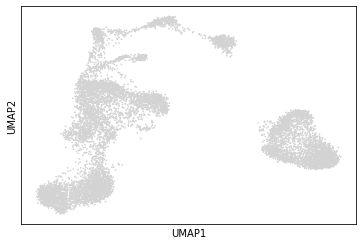

In [58]:
sc.pl.umap(adata)

In [62]:
# a writer for type <class 'scipy.sparse.coo.coo_matrix'> has not been implemented yet.
from scipy.sparse import csr_matrix

adata.X = csr_matrix(adata.X)

In [63]:
adata.write(
    os.path.join(path_data, "preprocessed.h5ad")
)